In [1]:

import numpy as np
import math
import matplotlib.pyplot as plt
#Initialize transformation matrix for predictions
#bm, br, bl, tr, tl
print('bm', 'br', 'bl', 'tr', 'tl')
T_expected_narrow = np.reshape([.5, 0, 0, .25, .25, 
                                0, 0, .75, .25, 0, 
                                0, .75, 0, 0, .25, 
                                .25, .25, 0, 0, .5, 
                                .25, 0, .25, .5, 0], (5, 5))
print(T_expected_narrow)
T_eb = np.vstack([T_expected_narrow[0], 
                             (T_expected_narrow[1] + T_expected_narrow[2]) , 
                             (T_expected_narrow[3] + T_expected_narrow[4])])
T_expected_broad = np.column_stack([T_eb[:, 0], 
                             (T_eb[:, 1]+ T_eb[:, 2]), 
                             (T_eb[:, 3]+ T_eb[:, 4])])
T_expected_broad_norm  = np.vstack([T_expected_broad[0]/np.sum(T_expected_broad[0]), 
                              T_expected_broad[1]/np.sum(T_expected_broad[1]), 
                              T_expected_broad[2]/np.sum(T_expected_broad[2])])
print('bm', 'b', 't')
print(T_expected_broad, np.sum(T_expected_broad, axis = 0), np.sum(T_expected_broad, axis = 1))
print(T_expected_broad_norm, np.sum(T_expected_broad_norm, axis = 0), np.sum(T_expected_broad_norm, axis = 1))

bm br bl tr tl
[[0.5  0.   0.   0.25 0.25]
 [0.   0.   0.75 0.25 0.  ]
 [0.   0.75 0.   0.   0.25]
 [0.25 0.25 0.   0.   0.5 ]
 [0.25 0.   0.25 0.5  0.  ]]
bm b t
[[0.5 0.  0.5]
 [0.  1.5 0.5]
 [0.5 0.5 1. ]] [1. 2. 2.] [1. 2. 2.]
[[0.5  0.   0.5 ]
 [0.   0.75 0.25]
 [0.25 0.25 0.5 ]] [0.75 1.   1.25] [1. 1. 1.]


In [2]:
# np.linalg expects a right matrix but I created a left matrix above, so I use the transpose for the eigenvalue calculation
eigvals, eigvecs = np.linalg.eig(T_expected_narrow.T)
eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
eigvec_one = eigvecs[:, eig_one_index]
evec_one = eigvec_one / eigvec_one[0]
print("Eigenvector for eigenvalue 1")
print(evec_one)

Eigenvector for eigenvalue 1
[1. 1. 1. 1. 1.]


In [3]:
# np.linalg expects a right matrix but I created a left matrix above, so I use the transpose for the eigenvalue calculation
eigvals, eigvecs = np.linalg.eig(T_expected_broad_norm.T)
eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
eigvec_one = eigvecs[:, eig_one_index]
evec_one = eigvec_one / eigvec_one[0]
print("Eigenvector for eigenvalue 1")
print(evec_one)

Eigenvector for eigenvalue 1
[1. 2. 2.]


In [4]:
def ratio(row):
    sums = np.sum(row)
    if sums > 0:
        return row/sums
    else:
        return row

In [ ]:
#broad observations array
trans_runs= np.load('trans_runs_transparentd.npy')[()]
num_top_keys = 4
num_full_keys = 6
num_tran_keys = 5
inds =  list(np.linspace(20, 40, 5))
print(inds)
x1 = []
x2 = []

T_obb = np.asarray([[31, 31],
     [28, 48]])
T_obb_norm = np.vstack([T_obb[i]/np.sum(T_obb[i]) for i in range(len(T_obb))])
print(T_obb, '\n', np.around(T_obb_norm, 2), np.sum(T_obb_norm, axis=1))
eigvals, eigvecs = np.linalg.eig(T_obb_norm.T)
eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
eigvec_one = eigvecs[:, eig_one_index]
evec_one = eigvec_one*100 / np.sum(eigvec_one)
print(evec_one)
#print("Eigenvector for eigenvalue 1 of T_obb_norm:")
#print(evec_one, eigvec_one, eigvecs, eigvals)
x1.append(evec_one[0])
x2.append(evec_one[1])
    
vec_t = x1
vec_c = x2
c1 = 'red'
c2 = 'orange'
#plt.ylim(0, 50)
#plt.plot((1, 1, 1),(23, 42, 35), 'x')

[20.0, 25.0, 30.0, 35.0, 40.0]
[[31 31]
 [28 48]] 
 [[0.5  0.5 ]
 [0.37 0.63]] [1. 1.]
[42.42424242 57.57575758]


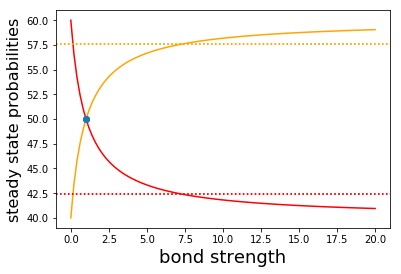

In [ ]:
"tESTING HYPOTHESIS WITH all position, early state unimportant, end sate proportional to bond strengths"
#narrow observations array
alphas = np.linspace(0, 20, 100)
x1 = []
x2 = []
x3 = []
for i in alphas:
    #print('\nalpha = %s' %i)
    T_expected_narrow = np.asarray([[2*i + 3, 3*i + 2],
     [2*i + 3, 3*i + 2]])
    T_expected_broad = T_expected_narrow
    T_expected_broad_norm = np.vstack([T_expected_broad[i]/np.sum(T_expected_broad[i]) for i in range(len(T_expected_broad))])
    #print(T_expected_broad_norm, '\n\n', np.around(T_expected_broad_norm, 2))
    eigvals, eigvecs = np.linalg.eig(T_expected_broad_norm.T)
    eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
    eigvec_one = eigvecs[:, eig_one_index]
    evec_one = eigvec_one*100 / np.sum(eigvec_one)
    #print("Eigenvector for eigenvalue 1 of T_ob_norm:")
    #print(evec_one)
    #plt.plot((i, i, i), (evec_one), 'x')
    x1.append(evec_one[0])
    x2.append(evec_one[1])
c1 = 'red'
c2 = 'orange'
plt.plot(alphas, x1, c = c1, ls = '-')
plt.plot(alphas, x2, c = c2, ls = '-')

plt.axhline(y=min(vec_t), c = c1, ls = ':')
plt.axhline(y=min(vec_c), c = c2, ls = ':')
plt.axhline(y=max(vec_t), c = c1, ls = ':')
plt.axhline(y=max(vec_c), c = c2, ls = ':')
plt.xlabel('bond strength', fontsize=18)
plt.ylabel('steady state probabilities', fontsize=16)
#plt.plot((1, 1, 1),(23, 42, 35), 'x')
plt.plot((1, 1),(50, 50), 'o')

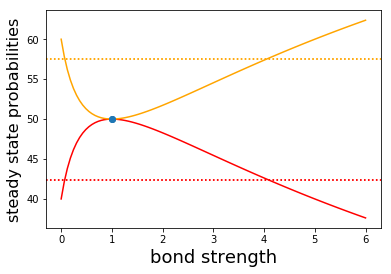

In [ ]:
##### "tESTING HYPOTHESIS WITH all 2 positions for particle to swing to"
#narrow observations array

alphas = np.linspace(0, 6, 100)#[ 0.5, 0.6, 0.7, 0.8, 1, 1.25, 1.3, 1.4, 2, 5]
x1 = []
x2 = []
x3 = []
for i in alphas:
    #print('\nalpha = %s' %i)
    T_expected_narrow = np.asarray([[4*i, 2*i + 2],
     [4, 2*i + 2]])
    T_expected_broad = T_expected_narrow
    T_expected_broad_norm = np.vstack([T_expected_broad[i]/np.sum(T_expected_broad[i]) for i in range(len(T_expected_broad))])
    #print(T_expected_broad_norm, '\n\n', np.around(T_expected_broad_norm, 2))
    eigvals, eigvecs = np.linalg.eig(T_expected_broad_norm.T)
    eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
    eigvec_one = eigvecs[:, eig_one_index]
    evec_one = eigvec_one*100 / np.sum(eigvec_one)
    #print("Eigenvector for eigenvalue 1 of T_ob_norm:")
    #print(evec_one)
    #plt.plot((i, i, i), (evec_one), 'x')
    x1.append(evec_one[0])
    x2.append(evec_one[1])
c1 = 'red'
c2 = 'orange'
plt.plot(alphas, x1, c = c1, ls = '-')
plt.plot(alphas, x2, c = c2, ls = '-')

plt.axhline(y=min(vec_t), c = c1, ls = ':')
plt.axhline(y=min(vec_c), c = c2, ls = ':')
plt.axhline(y=max(vec_t), c = c1, ls = ':')
plt.axhline(y=max(vec_c), c = c2, ls = ':')
plt.xlabel('bond strength', fontsize=18)
plt.ylabel('steady state probabilities', fontsize=16)
#plt.plot((1, 1, 1),(23, 42, 35), 'x')
plt.plot((1, 1),(50, 50), 'o')

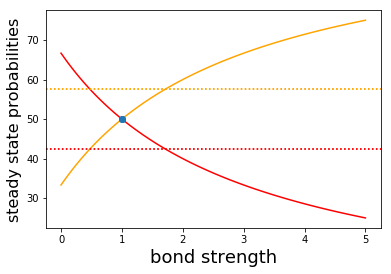

In [ ]:
"tESTING HYPOTHESIS WITH 2 positions for particle to swing to (no swing back to old state), and original state matters"
#narrow observations array
alphas = np.linspace(0,5, 100)
x1 = []
x2 = []
x3 = []
for i in alphas:
    #print('\nalpha = %s' %i)
    T_expected_narrow = np.asarray([[2, i + 1],
     [4/(i+1), 2]])
    T_expected_broad = T_expected_narrow
    T_expected_broad_norm = np.vstack([T_expected_broad[i]/np.sum(T_expected_broad[i]) for i in range(len(T_expected_broad))])
    #print(T_expected_broad_norm, '\n\n', np.around(T_expected_broad_norm, 2))
    eigvals, eigvecs = np.linalg.eig(T_expected_broad_norm.T)
    eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
    eigvec_one = eigvecs[:, eig_one_index]
    evec_one = eigvec_one*100 / np.sum(eigvec_one)
    #print("Eigenvector for eigenvalue 1 of T_ob_norm:")
    #print(evec_one)
    #plt.plot((i, i, i), (evec_one), 'x')
    x1.append(evec_one[0])
    x2.append(evec_one[1])
c1 = 'red'
c2 = 'orange'
plt.plot(alphas, x1, c = c1, ls = '-')
plt.plot(alphas, x2, c = c2, ls = '-')

plt.axhline(y=min(vec_t), c = c1, ls = ':')
plt.axhline(y=min(vec_c), c = c2, ls = ':')
plt.axhline(y=max(vec_t), c = c1, ls = ':')
plt.axhline(y=max(vec_c), c = c2, ls = ':')
plt.xlabel('bond strength', fontsize=18)
plt.ylabel('steady state probabilities', fontsize=16)
#plt.plot((1, 1, 1),(23, 42, 35), 'x')
plt.plot((1, 1),(50, 50), 'o')

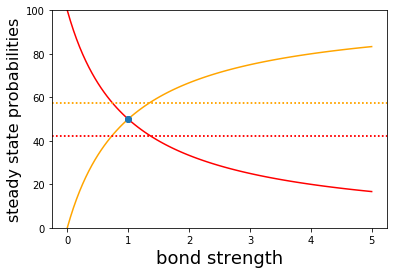

In [ ]:


"tESTING HYPOTHESIS WITH break apart and both weights"
#narrow observations array
fig, ax = plt.subplots()
plt.ylim(0, 100)
alphas = np.linspace(0, 5, 100)
x1 = []
x2 = []
x3 = []
for i in alphas:
    #print('\nalpha = %s' %i)
    #print(tm)
    t = (2/((1+i)*(2+2*i))+
         4*i/((1+i)*(2+2*i)*(4+2*i))+
          2*i/((1+i)*(4+2*i)))
    #print(bm)
    c = (2*i/((1+i)*(4+2*i))+
          i*(2+2*i)/((1+i)*(4+2*i)))
    
    T_expected_narrow = np.asarray([[t, c],
     [t, c]])
    T_expected_broad = T_expected_narrow
    T_expected_broad_norm = np.vstack([T_expected_broad[i]/np.sum(T_expected_broad[i]) for i in range(len(T_expected_broad))])
    #print(T_expected_broad_norm, '\n\n', np.around(T_expected_broad_norm, 2))
    eigvals, eigvecs = np.linalg.eig(T_expected_broad_norm.T)
    eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
    eigvec_one = eigvecs[:, eig_one_index]
    evec_one = eigvec_one*100 / np.sum(eigvec_one)
    #print("Eigenvector for eigenvalue 1 of T_ob_norm:")
    #print(evec_one)
    #plt.plot((i, i, i), (evec_one), 'x')
    x1.append(evec_one[0])
    x2.append(evec_one[1])
c1 = 'red'
c2 = 'orange'
plt.plot(alphas, x1, c = c1, ls = '-')
plt.plot(alphas, x2, c = c2, ls = '-')

plt.axhline(y=min(vec_t), c = c1, ls = ':')
plt.axhline(y=min(vec_c), c = c2, ls = ':')
plt.axhline(y=max(vec_t), c = c1, ls = ':')
plt.axhline(y=max(vec_c), c = c2, ls = ':')
plt.xlabel('bond strength', fontsize=18)
plt.ylabel('steady state probabilities', fontsize=16)
#plt.plot((1, 1, 1),(23, 42, 35), 'x')
plt.plot((1, 1),(50, 50), 'o')

In [ ]:


"tESTING HYPOTHESIS WITH break apart and both weights"
#narrow observations array
fig, ax = plt.subplots()
plt.ylim(0, 100)
alphas = np.linspace(0, 4, 80)
ratios = np.linspace(0, 1, 80)
tolerances = [(min(vec_t)-1, max(vec_t)+1), (min(vec_c)-1, max(vec_c)+1)]

x1 = []
x2 = []
x3 = []
for i in alphas:
    for r in ratios:
        #print('\nalpha = %s' %i)
        #print(tm)
        t = (2/((1+i)*(2+2*i))+
             4*i/((1+i)*(2+2*i)*(4+2*i))+
              2*i/((1+i)*(4+2*i)))
        #print(bm)
        c = (2*i/((1+i)*(4+2*i))+
              i*(2+2*i)/((1+i)*(4+2*i)))

        T2 = np.asarray([[t, c],
         [t, c]])
        T1 = np.asarray([[2, i + 1],
         [4/(i+1), 2]])
        T_expected_narrow = r*T1 + (1-r)*T2
        #print(T_expected_narrow)
        T_expected_broad = T_expected_narrow
        T_expected_broad_norm = np.vstack([T_expected_broad[i]/np.sum(T_expected_broad[i]) for i in range(len(T_expected_broad))])
        #print(T_expected_broad_norm, '\n\n', np.around(T_expected_broad_norm, 2))
        eigvals, eigvecs = np.linalg.eig(T_expected_broad_norm.T)
        eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
        eigvec_one = eigvecs[:, eig_one_index]
        evec_one = eigvec_one*100 / np.sum(eigvec_one)
        #print("Eigenvector for eigenvalue 1 of T_ob_norm:")
        #print(evec_one)
        #plt.plot((i, i, i), (evec_one), 'x')
        test = all((evec_one[i]>= tolerances[i][0] and evec_one[i]<= tolerances[i][1])  for i in range(len(evec_one)))
        if test:
            col = "green"
        else:
            col = "k"
        plt.plot(r, i, c=col, marker='o')
plt.ylim(0, 4)
plt.ylabel('bond strength', fontsize=18)
plt.xlabel('proprtion of hinge motion', fontsize=16)

In [ ]:


"tESTING HYPOTHESIS WITH break apart and both weights"
#narrow observations array
fig, ax = plt.subplots()
plt.ylim(0, 100)
alphas = np.linspace(0.001, 4, 80)
ratios = np.linspace(0.001, 1, 80)
for i in alphas:
    for r in ratios:
        #print('\nalpha = %s' %i)
        #print(tm)
        t = (2/((1+i)*(2+2*i))+
             4*i/((1+i)*(2+2*i)*(4+2*i))+
              2*i/((1+i)*(4+2*i)))
        #print(bm)
        c = (2*i/((1+i)*(4+2*i))+
              i*(2+2*i)/((1+i)*(4+2*i)))

        T2 = np.asarray([[t, c],
         [t, c]])
        T1 = np.asarray([[2, i + 1],
         [4/(i+1), 2]])
        T_expected_narrow = r*T1 + (1-r)*T2
        #print(T_expected_narrow)
        T_expected_broad = T_expected_narrow
        T_expected_broad_norm = np.vstack([T_expected_broad[i]/np.sum(T_expected_broad[i]) for i in range(len(T_expected_broad))])
        #print(T_expected_broad_norm, '\n\n', np.around(T_expected_broad_norm, 2))
        eigvals, eigvecs = np.linalg.eig(T_expected_broad_norm.T)
        eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
        eigvec_one = eigvecs[:, eig_one_index]
        evec_one = eigvec_one*100 / np.sum(eigvec_one)
        #print("Eigenvector for eigenvalue 1 of T_ob_norm:")
        #print(evec_one, int(evec_one[0]//10 -0.001), evec_one[0]//10 )
        #plt.plot((i, i, i), (evec_one), 'x')
        plt.plot(r, i, c='C' + str(int(evec_one[0]/10)), marker='o')#, cmap=plt.cm.get_cmap('RdBu'), marker='o')
plt.ylim(0, 4)
plt.ylabel('bond strength', fontsize=18)
plt.xlabel('proprtion of hinge motion', fontsize=16)

#sample initial distributions of states, given 50 steps to equalize to a stady state
reps = 50
trials = 6
for i in range(trials):
    x0 = np.random.random_integers(0, 10, 5) 
    x0 = x0*100/sum(x0)
    xs = np.zeros((len(x0), reps))
    xs[:,0] = x0
    ys = [0]
    T = T_expected_narrow
    for rep in range(1, reps):
        x_rep = T.dot(xs[:, rep-1])
        #print(x_rep)
        xs[:, rep] = x_rep
        ys.append(rep)
    #print(xs)
    fig, ax = plt.subplots()
    ax.plot(ys, xs[0],'.', ys, xs[1], '.', ys,xs[2],'.', ys,xs[3],'.', ys, xs[4], '.')
